You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from dataclasses import dataclass


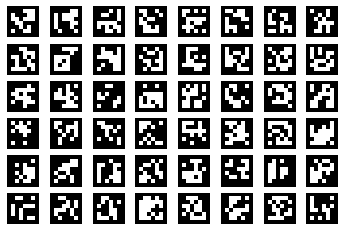

In [3]:
#imagesFolder = "E:\Desktop\S8\Projet 851\data"

aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)

fig = plt.figure()
nx = 8
ny = 6
for i in range(1, nx*ny+1):
    ax = fig.add_subplot(ny,nx, i)
    img = aruco.drawMarker(aruco_dict,i-1, 700)
    plt.imshow(img, cmap = mpl.cm.gray, interpolation = "nearest")
    ax.axis("off")

plt.savefig("board.pdf")    
plt.show()
plt.close()

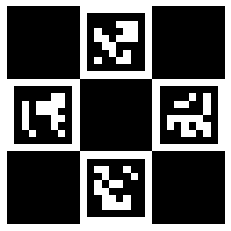

Starting Calibration !


In [4]:
board = aruco.CharucoBoard_create(3, 3, 1, 0.8, aruco_dict)
imboard = board.draw((4000, 4000))
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(imboard, cmap = mpl.cm.gray, interpolation = "nearest")
ax.axis("off")
cv2.imwrite("Aruco\chessboard.tiff",imboard)
#plt.savefig(imagesFolder + "/chessboard.pdf")   
plt.grid()
plt.show()
print("Starting Calibration !")

In [4]:
im = PIL.Image.open("Calib Images/DSC_1299.JPG")
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(im)
ax.axis('off')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Calib Images/DSC_1299.JPG'

In [36]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    #decimator = 0
    
    for im in images:
        print("=> Processing image {0}".format(im))
        frame = cv2.imread(im)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(res[0])>0:
            res2 = cv2.aruco.interpolateCornersCharuco(res[0],res[1],gray,board)        
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 :
                allCorners.append(res2[1])
                allIds.append(res2[2]) 
            else:
                print("=x Rejected image {0}".format(im))
            

        #decimator+=1   

    imsize = gray.shape
    return allCorners,allIds,imsize
    print("finished")

In [40]:
type(board)

cv2.aruco_CharucoBoard

In [43]:
#%%time
images = ["Calibration Images/" + f for f in os.listdir("Calibration Images/") if f.startswith("DSC_")]
allCorners,allIds,imsize=read_chessboards(images)



POSE ESTIMATION STARTS:
=> Processing image Calibration Images/DSC_1348.JPG
=> Processing image Calibration Images/DSC_1349.JPG
=> Processing image Calibration Images/DSC_1350.JPG
=> Processing image Calibration Images/DSC_1351.JPG
=> Processing image Calibration Images/DSC_1352.JPG
=> Processing image Calibration Images/DSC_1353.JPG
=> Processing image Calibration Images/DSC_1360.JPG
=> Processing image Calibration Images/DSC_1361.JPG
=x Rejected image Calibration Images/DSC_1361.JPG
=> Processing image Calibration Images/DSC_1362.JPG
=x Rejected image Calibration Images/DSC_1362.JPG
=> Processing image Calibration Images/DSC_1363.JPG
=x Rejected image Calibration Images/DSC_1363.JPG
=> Processing image Calibration Images/DSC_1364.JPG
=> Processing image Calibration Images/DSC_1365.JPG
=> Processing image Calibration Images/DSC_1366.JPG
=x Rejected image Calibration Images/DSC_1366.JPG
=> Processing image Calibration Images/DSC_1367.JPG
=x Rejected image Calibration Images/DSC_1367.JP

In [44]:
print(len(allCorners))

27


In [9]:
frame = cv2.imread("Calibration Images\DSC_1371.JPG")
imS = cv2.resize(frame, (960, 540)) 
gray = cv2.cvtColor(imS, cv2.COLOR_BGR2GRAY)
cv2.imshow("image", gray)
cv2.waitKey()  
cv2.destroyAllWindows()

In [13]:

#allCorners,allIds,imsize=read_chessboards(["Calibration Images/DSC_1412.JPG", "Calibration Images/DSC_1413.JPG", "Calibration Images/DSC_1414.JPG" , "Calibration Images/DSC_1415.JPG", "Calibration Images/DSC_1416.JPG", "Calibration Images/DSC_1417.JPG", "Calibration Images/DSC_1418.JPG", "Calibration Images/DSC_1419.JPG"])

POSE ESTIMATION STARTS:
=> Processing image Calibration Images/DSC_1412.JPG
=> Processing image Calibration Images/DSC_1413.JPG
=> Processing image Calibration Images/DSC_1414.JPG
=> Processing image Calibration Images/DSC_1415.JPG
=> Processing image Calibration Images/DSC_1416.JPG
=> Processing image Calibration Images/DSC_1417.JPG
=> Processing image Calibration Images/DSC_1418.JPG
=> Processing image Calibration Images/DSC_1419.JPG


In [ ]:
tvecs[0] = np.array([[ 5.95707439], [-7.55687401], [  15.24889929]])

TypeError: 'tuple' object does not support item assignment

In [45]:
def calibrate_camera(allCorners,allIds,imsize):   
    """
    Calibrates the camera using the dected corners.
    """
    print("CAMERA CALIBRATION")
    
    cameraMatrixInit = np.array([[ 2000.,    0., imsize[0]/2.],
                                 [    0., 2000., imsize[1]/2.],
                                 [    0.,    0.,           1.]])

    distCoeffsInit = np.zeros((5,1))
    flags = (cv2.CALIB_USE_INTRINSIC_GUESS + cv2.CALIB_RATIONAL_MODEL) 
    (ret, camera_matrix, distortion_coefficients0, 
     rotation_vectors, translation_vectors,
     stdDeviationsIntrinsics, stdDeviationsExtrinsics, 
     perViewErrors) = cv2.aruco.calibrateCameraCharucoExtended(
                      charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=board,
                      imageSize=imsize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9))

    return ret, camera_matrix, distortion_coefficients0, rotation_vectors, translation_vectors, stdDeviationsIntrinsics, stdDeviationsExtrinsics
    print("finished")

In [46]:
%%time
ret, mtx, dist, rvecs, tvecs, stdvint, stdvext = calibrate_camera(allCorners,allIds,imsize)
ret

CAMERA CALIBRATION
Wall time: 8.97 s


71.30774607500551

In [48]:
mtx #camera matrix


array([[3.21143355e+03, 0.00000000e+00, 3.24441321e+03],
       [0.00000000e+00, 7.75309995e+02, 5.13147914e+03],
       [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [49]:
mtx[1,1] / mtx[0,0]

0.24142177696351133

In [47]:
stdvint

array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.]])

In [46]:
tvecs

(array([[-1.86068923],
        [-3.13826371],
        [ 4.36892417]]),
 array([[-1.832107  ],
        [-3.07564462],
        [ 4.3893189 ]]),
 array([[-2.03486828],
        [-2.51196463],
        [ 8.52404712]]),
 array([[-2.81387425],
        [-2.38088375],
        [ 5.42349185]]),
 array([[-2.76872933],
        [-2.37008167],
        [ 5.35011874]]),
 array([[-0.17382869],
        [ 0.07814657],
        [ 6.44256632]]),
 array([[-4.0305799 ],
        [-7.45184859],
        [ 4.13451688]]),
 array([[-4.04876976],
        [-7.55169001],
        [ 4.19433563]]))

In [ ]:
allCorners[2]

array([[[7386.27   ,  280.29288]],

       [[7193.7603 ,  281.52756]],

       [[7367.5605 ,  473.59988]],

       [[7176.3027 ,  474.0487 ]]], dtype=float32)

In [ ]:
print(allCorners[1])
print(allCorners[1].reshape(4, 2))

[[[7395.8193   254.6424 ]]

 [[4390.644    211.22253]]

 [[4568.917    405.18268]]

 [[1587.3247   366.20444]]]
[[7395.8193   254.6424 ]
 [4390.644    211.22253]
 [4568.917    405.18268]
 [1587.3247   366.20444]]


In [ ]:
print(rvecs[3])

[[-0.0304809 ]
 [ 3.16268046]
 [ 0.04682014]]


In [ ]:
print(tvecs[2])

[[ 16.03940954]
 [-13.69671505]
 [  7.29956628]]


In [ ]:
tot_error=0
total_points=0


for i in range(len(allCorners)):
    imgpoints, _ = cv2.projectPoints(allCorners[i], rvecs[i], tvecs[i], mtx, dist)
    imp = imgpoints2.reshape(-1,2)
    tot_error+=np.sum(np.abs(allIds[i]-imgpoints2[i])**2)
    total_points+=len(allCorners[i])

error: OpenCV(4.5.5) /io/opencv/modules/calib3d/src/calibration.cpp:3563: error: (-215:Assertion failed) npoints >= 0 && (depth == CV_32F || depth == CV_64F) in function 'projectPoints'


In [6]:
marker_colored = cv2.imread("Aruco\chessboard.tiff", 0)

In [7]:
marker_colored =  cv2.resize(marker_colored, (480,480), interpolation = cv2.INTER_CUBIC )
#marker = cv2.cvtColor(marker_colored, cv2.COLOR_BGR2GRAY)  
plt.imshow(marker_colored, cmap = mpl.cm.gray, interpolation = "nearest")

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
def get_bit_sig(image, contour_pts, thresh = 127):
    ans = []

    #getting all the 4 corners of the quad
    a, b = contour_pts[0][0]
    c, d = contour_pts[1][0]
    e, f = contour_pts[3][0]
    g, h = contour_pts[2][0]

    for i in range(8):
        for j in range(8):
            #using bilinear interpolation to find the coordinate using fractional contributions of the corner 4 points
            f1 = float(i)/8 + 1./16 #fraction1
            f2 = float(j)/8 + 1./16 #fraction2

            #finding the intermediate coordinates 
            upper_x = (1-f1)*a + f1*(c)
            lower_x = (1-f1)*e + f1*(g)
            upper_y = (1-f1)*b + f1*d
            lower_y = (1-f1)*(f) + f1*(h)

            x = int( (1-f2)*upper_x + (f2)*lower_x )
            y = int( (1-f2)*upper_y + (f2)*lower_y )

            #thresholding
            if image[y][x] >= 127:
                ans.append(1)
            else:
                ans.append(0)
    return ans

In [ ]:
marker = marker_colored
h,w = marker.shape
marker_sig1 = get_bit_sig(marker, np.array([[0,0],[0,w], [h,w], [h,0]]).reshape(4,1,2))
marker_sig2 = get_bit_sig(marker, np.array([[0,w], [h,w], [h,0], [0,0]]).reshape(4,1,2))
marker_sig3 = get_bit_sig(marker, np.array([[h,w],[h,0], [0,0], [0,w]]).reshape(4,1,2))
marker_sig4 = get_bit_sig(marker, np.array([[h,0],[0,0], [0,w], [h,w]]).reshape(4,1,2))
sigs = [marker_sig1, marker_sig2, marker_sig3, marker_sig4]

In [ ]:
def find_pattern_aruco(image, aruco_marker, sigs):
    #converting image to black and white
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)   
    
    #adaptive thresholding for robustness against varying lighting
    thresholded = cv2.adaptiveThreshold(gray, 255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,11,10)
    h, w = aruco_marker.shape

    contours ,_= cv2.findContours(thresholded, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    print(len(contours))
    cv2.drawContours(image, contours, -1, (0,255,0), 3)
    plt.imshow(image)
    
    for cnt in contours : 
        
        approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True) 
        if approx.shape[0]==4:
            x1 = approx[0][0][0] 
            x2 = approx[1][0][0]
            y1 = approx[0][0][1]
            y2 = approx[1][0][1]

            norm = (x1 - x2)**2 + (y1 - y2)**2
            #constraint on minimum edge size of quad
            if norm > 100:
                temp_sig = get_bit_sig(gray, approx)
                match1 = match_sig(sigs[0], temp_sig)
                match2 = match_sig(sigs[1], temp_sig)
                match3 = match_sig(sigs[2], temp_sig)
                match4 = match_sig(sigs[3], temp_sig)

                if (match1 or match2 or match3 or match4):
                    dst_pts = approx
                    if match1:
                        src_pts = np.array([[0,0],[0,w], [h,w], [h,0]])
                    if match2:
                        src_pts = np.array([[0,w], [h,w], [h,0], [0,0]])
                    if match3:
                        src_pts = np.array([[h,w],[h,0], [0,0], [0,w]])
                    if match4:
                        src_pts = np.array([[h,0],[0,0], [0,w], [h,w]])

                    # removed for consistency across both programs - with and without tracking
                    # cv2.drawContours(image, [approx], 0, (0, 0, 255), 2) #mark red outline for found marker 

                    return src_pts, dst_pts, True

    #reaching here implies nothing was found
    return None, None, False  

In [ ]:
def match_sig(sig1, sig2, thresh = 62):
    # print(sum([ (1- abs(a - b)) for a, b in zip(sig1, sig2)]))
    if sum([ (1- abs(a - b)) for a, b in zip(sig1, sig2)]) >= 62:
        return True
    else:
        return False

In [ ]:
def find_homography_aruco(image, aruco_marker, sigs):
    src_pts, dst_pts, found = find_pattern_aruco(image, aruco_marker, sigs)
    H = None
    if found:
        H, mask = cv2.findHomography(src_pts.reshape(-1,1,2), dst_pts.reshape(-1,1,2), cv2.RANSAC,5.0)

    if H is None:
        return False, None
    else:
        return True, H

In [ ]:
H = np.random.rand(3,3)

In [117]:
Distort = np.array([[221, 670],[607, 674], [965, 676], [980, 1537], [633, 1559], [258, 1582], [235, 1131], [973, 1111]])
DistortH = np.array([[295, 717], [678, 731], [1006, 746], [1025, 1376], [657, 1377], [231, 1372], [214, 1037], [1037, 1054]])

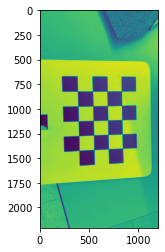

In [113]:
chessPhoneCol = cv2.imread("IMG-2483.JPG")
chessPhone = cv2.cvtColor(chessPhoneCol, cv2.COLOR_BGR2GRAY)
plt.imshow(chessPhone)

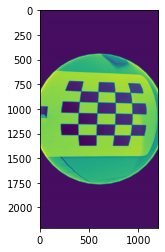

In [114]:
chessPhoneDistCol = cv2.imread("IMG-2482.JPG")
chessPhoneDist = cv2.cvtColor(chessPhoneDistCol, cv2.COLOR_BGR2GRAY)
plt.imshow(chessPhoneDist)

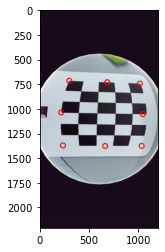

In [118]:
for idx, pt in enumerate(Distort):
    cv2.circle(chessPhoneCol, (int(pt[0]), int(pt[1])), 25, (255, 0, 0), 9)
    cv2.circle(chessPhoneDistCol, (int(DistortH[idx][0]), int(DistortH[idx][1])), 25, (255, 0, 0), 9)

plt.imshow(chessPhoneDistCol)

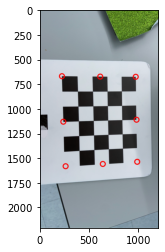

In [119]:
plt.imshow(chessPhoneCol)

In [41]:
_ret, _corners = cv2.findChessboardCorners(chFrame, (4,4), flags=cv2.CALIB_CB_ADAPTIVE_THRESH
                                                + cv2.CALIB_CB_EXHAUSTIVE)

In [40]:
_ret

False

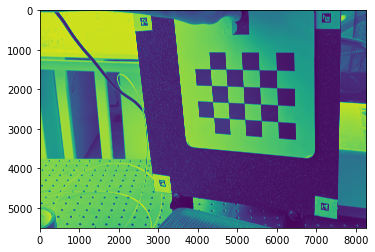

In [16]:
chessCol = cv2.imread("checkerboards\straight1.JPG")
chFrame = cv2.cvtColor(chessCol, cv2.COLOR_BGR2GRAY)
plt.imshow(chFrame)

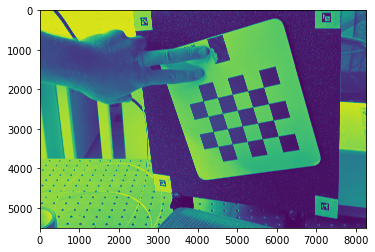

In [11]:
chessCol = cv2.imread("checkerboards\slant1.JPG")
chFrame = cv2.cvtColor(chessCol, cv2.COLOR_BGR2GRAY)
plt.imshow(chFrame)

In [15]:
_chessCol = cv2.resize(chessCol, (int(w/4), int(h/4)), interpolation = cv2.INTER_AREA)
cv2.imshow("slant1", _chessCol)
cv2.waitKey()  
cv2.destroyAllWindows()

In [53]:
chessImgs = ["checkerboards/" + f for f in os.listdir("checkerboards/")]

In [ ]:
for _img in chessImgs:
    _chessCol = cv2.imread(_img)
    _chFrame = cv2.cvtColor(_chessCol, cv2.COLOR_BGR2GRAY)
    _ret, _corners = cv2.findChessboardCorners(chFrame, (3,3), flags=cv2.CALIB_CB_ADAPTIVE_THRESH
                                                + cv2.CALIB_CB_EXHAUSTIVE)
    if _ret:
        print(_ret)
        print(_corners)
        break

In [50]:
ret, corners = cv2.findChessboardCorners(chFrame, (3,3), flags=cv2.CALIB_CB_ADAPTIVE_THRESH
                                                + cv2.CALIB_CB_EXHAUSTIVE)

In [51]:
ret

False

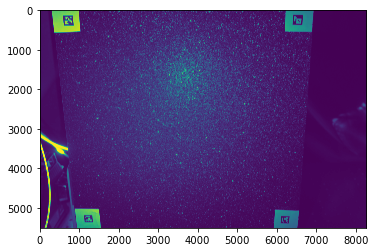

In [144]:
frameCol = cv2.imread("Homography11.JPG")
frame = cv2.cvtColor(frameCol, cv2.COLOR_BGR2GRAY)
plt.imshow(frame)

In [145]:
para = cv2.aruco.DetectorParameters_create()
para.cornerRefinementMethod = cv2.aruco.CORNER_REFINE_SUBPIX

In [146]:
 bboxs, ids, rejected = cv2.aruco.detectMarkers(frame, aruco_dict, parameters = para)

In [147]:
bboxs

(array([[[6089.326 , 5199.7305],
         [6301.0103, 5205.4536],
         [6284.2646, 5391.408 ],
         [6073.0977, 5384.163 ]]], dtype=float32),
 array([[[1317.5045, 5179.0786],
         [1337.2582, 5357.947 ],
         [1128.2207, 5358.38  ],
         [1107.5646, 5178.795 ]]], dtype=float32),
 array([[[850.3361 , 388.47083],
         [604.22656, 391.15845],
         [577.2171 , 144.35577],
         [824.1679 , 142.54715]]], dtype=float32),
 array([[[6374.993  ,  371.94476],
         [6395.649  ,  120.58776],
         [6643.916  ,  128.12543],
         [6623.542  ,  375.18982]]], dtype=float32))

In [103]:
len(bboxs)


3

In [104]:
ids

array([[1],
       [9],
       [0]], dtype=int32)

In [148]:
refPts = []

if  len(bboxs)!=0:  
    for Corner, id in zip(bboxs, ids):               
        corners = Corner.reshape((4, 2))
        (topLeft, topRight, bottomRight, bottomLeft) = corners
        topRight = (int(topRight[0]), int(topRight[1]))
        bottomRight = (int(bottomRight[0]), int(bottomRight[1]))
        bottomLeft = (int(bottomLeft[0]), int(bottomLeft[1]))
        topLeft = (int(topLeft[0]), int(topLeft[1]))

        # draw lines around the marker and display the marker id
        cv2.line(frameCol, topLeft, topRight, (0, 255, 0), 7)
        cv2.line(frameCol, topRight, bottomRight, (0, 255, 0), 7)
        cv2.line(frameCol, bottomRight, bottomLeft, (0, 255, 0), 7)
        cv2.line(frameCol, bottomLeft, topLeft, (0, 255, 0), 7)                    
        cv2.putText(frame, str(id),(topLeft[0], topLeft[1] - 15), cv2.FONT_HERSHEY_SIMPLEX,2.5, (255, 0, 0), 2)
        corner = np.squeeze(Corner)
        refPts.append(corner)
        imS = cv2.resize(frameCol, (960, 540))   
        cv2.imshow("show", imS)
        cv2.waitKey()  
        cv2.destroyAllWindows()
        #print(str(id))
    imS = cv2.resize(frameCol, (960, 540))   
    cv2.imshow("show", imS)
    cv2.waitKey()  
    cv2.destroyAllWindows()

In [108]:
refPts

[array([[1409.6506, 4979.862 ],
        [1416.453 , 5145.655 ],
        [1217.3484, 5145.8784],
        [1208.5106, 4978.6553]], dtype=float32),
 array([[6501.5874 ,  490.0575 ],
        [6534.033  ,  258.33636],
        [6754.5938 ,  270.47635],
        [6722.2764 ,  502.5156 ]], dtype=float32),
 array([[1250.2235 ,  302.96762],
        [1005.55084,  295.4278 ],
        [ 994.6334 ,   54.57281],
        [1240.6366 ,   62.18476]], dtype=float32),
 array([[6523.5073, 5187.63  ],
        [6738.2954, 5196.6904],
        [6715.449 , 5373.766 ],
        [6501.952 , 5363.594 ]])]

In [ ]:
#bottom right 1
#bottom left 1
#top right 9
#top left 0

In [9]:
h, w = frameCol.shape[:2]
print(h)
print(w)

5504
8256


In [55]:
ids

array([[1],
       [1],
       [0],
       [9]], dtype=int32)

In [10]:
refPts

[array([[6089., 5201.],
        [6301., 5206.],
        [6284., 5391.],
        [6074., 5384.]], dtype=float32),
 array([[1317., 5179.],
        [1338., 5357.],
        [1127., 5357.],
        [1107., 5180.]], dtype=float32),
 array([[850., 389.],
        [605., 392.],
        [576., 146.],
        [823., 142.]], dtype=float32),
 array([[6375.,  372.],
        [6397.,  119.],
        [6643.,  125.],
        [6622.,  377.]], dtype=float32)]

In [280]:
_idx = np.where(refPts == np.amin(refPts[:3], axis = 0)[0])[0][0]
print(_idx)
np.amin(np.amin(refPts[:3], axis=0), axis=0)

1


array([1563.,  317.], dtype=float32)

In [70]:
def organizePts(pts): #BR, TR, TL, BL
    _ids = ids.flatten()
    TRidx, TLidx = np.where(_ids == 9)[0][0] , np.where(_ids == 0)[0][0] 
    pTR = pts[TRidx][np.where(pts[TRidx] == np.amin(pts[TRidx], axis=0)[0])[0][0]]
    pTL = pts[TLidx][np.where(pts[TLidx] == np.amin(pts[TLidx], axis=0)[0])[0][0]]
    
    _id = 0
    pts = np.delete(pts, TRidx, 0)
    delIdx = TLidx
    if TLidx > TRidx:
        delIdx = TLidx - 1
    pts = np.delete(pts, delIdx, 0)
    
    print(TRidx)
    print(delIdx)
    print(TLidx)
    print(pts)
    
    bl_idx = np.where(pts == np.amin(pts, axis=0)[0])[0][0]
    br_idx = np.where(pts == np.amax(pts, axis=0)[0])[0][0]
    
    np.amin(np.amin(refPts[:3], axis=0), axis=0)
    print(bl_idx)
    print(br_idx)
    print(np.where(pts[br_idx] == np.amax(np.amax(pts[br_idx], axis=0), axis=0))[0][0])
    
    bottomX = np.amin(np.amin(pts[bl_idx], axis=0), axis=0)
    
    
    pBL = pts[bl_idx][np.where(pts[bl_idx] == bottomX)[0][0]]
    pBR = pts[br_idx][np.where(pts[br_idx] == np.amax(np.amax(pts[br_idx], axis=0), axis=0))[0][0]]
            
    print(pBL)
    print(pTL)
    print(pTR)
    print(pBR)
    
    return pBL, pTL, pTR, pBR


In [30]:
def getPoints(arr, loc):
    scores = [np.sqrt((pt[0] - loc[0])**2 + (pt[1] - loc[1])**2) for pt in arr]
    return arr[np.argmin(scores)], np.mean(scores)


In [33]:
print(h)
print(w)

5504
8256


In [149]:
def findSheetCorners(pts):
    _ids = ids.flatten()
    TRidx, TLidx = np.where(_ids == 9)[0][0] , np.where(_ids == 0)[0][0]
    TL, _ = getPoints(pts[2], [0, h/2])
    TR, _ = getPoints(pts[TRidx], [w/2, h/2]) #we're assuming that the bottom left is closest to the center of image
    
    #cull our array to exclude discovered corners 
    pts = np.delete(pts, TRidx, 0)
    delIdx = TLidx
    if TLidx > TRidx:
        delIdx = TLidx - 1
    pts = np.delete(pts, delIdx, 0)
    #makes the next search easier
    
    
    
    scoresBL = getPoints(pts[0], [0, h]), getPoints(pts[1], [0, h])
    scoresBR = getPoints(pts[0], [w/2, h]), getPoints(pts[1], [w/2, h])
    BLidx = 1
    if scoresBL[0][1] < scoresBL[1][1]:
        BLidx = 0
    BRidx = BLidx - 1
    BL, BR = scoresBL[BLidx][0], scoresBR[BRidx][0]
    
    cv2.circle(frameCol, (int(BL[0]), int(BL[1])), 25, (255, 0, 0), 9)
    cv2.circle(frameCol, (int(BR[0]), int(BR[1])), 25, (255, 0, 0), 9)
    cv2.circle(frameCol, (int(TR[0]), int(TR[1])), 25, (255, 0, 0), 9)
    cv2.circle(frameCol, (int(TL[0]), int(TL[1])), 25, (255, 0, 0), 9)
    
    plt.imshow(frameCol)
    #print(scoresBR)
    #print(scoresBL)
    
    print(BL)
    print(TL)
    print(TR)
    print(BR)
    
    

In [150]:
refPts

[array([[6089.326 , 5199.7305],
        [6301.0103, 5205.4536],
        [6284.2646, 5391.408 ],
        [6073.0977, 5384.163 ]], dtype=float32),
 array([[1317.5045, 5179.0786],
        [1337.2582, 5357.947 ],
        [1128.2207, 5358.38  ],
        [1107.5646, 5178.795 ]], dtype=float32),
 array([[850.3361 , 388.47083],
        [604.22656, 391.15845],
        [577.2171 , 144.35577],
        [824.1679 , 142.54715]], dtype=float32),
 array([[6374.993  ,  371.94476],
        [6395.649  ,  120.58776],
        [6643.916  ,  128.12543],
        [6623.542  ,  375.18982]], dtype=float32)]

[1128.2207 5358.38  ]
[604.22656 391.15845]
[6374.993    371.94476]
[6073.0977 5384.163 ]


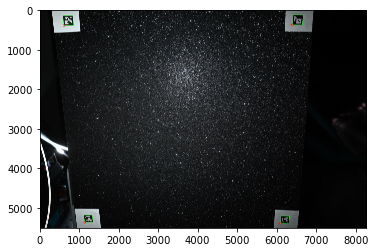

In [157]:
findSheetCorners(refPts)

In [151]:
def findMarkerCorners(pts):
    BL, TL, TR, BR = Marker(), Marker(), Marker(), Marker()
    _ids = ids.flatten()
    TRidx, TLidx = np.where(_ids == 9)[0][0] , np.where(_ids == 0)[0][0]
    
    TL.BL = getPoints(pts[2], [0, h/2])[0]
    TL.BR = getPoints(pts[2], [w/2, h/2])[0]
    TL.TR = getPoints(pts[2], [w/4, 0])[0]
    TL.TL = getPoints(pts[2], [0, 0])[0]
    
    TR.BL, _ = getPoints(pts[TRidx], [w/2, h/2]) #we're assuming that the bottom left is closest to the center of image
    TR.BR = getPoints(pts[TRidx], [w, h/2])[0]
    TR.TR = getPoints(pts[TRidx], [w, 0])[0]
    TR.TL = getPoints(pts[TRidx], [3*w/4, 0])[0]
    
    #cull our array to exclude discovered corners 
    pts = np.delete(pts, TRidx, 0)
    delIdx = TLidx
    if TLidx > TRidx:
        delIdx = TLidx - 1
    pts = np.delete(pts, delIdx, 0)
    #makes the next search easier

    scoresBL = getPoints(pts[0], [0, h]), getPoints(pts[1], [0, h])
    scoresBR = getPoints(pts[0], [w/2, h]), getPoints(pts[1], [w/2, h])
    BLidx = 1
    if scoresBL[0][1] < scoresBL[1][1]:
        BLidx = 0
    BRidx = BLidx - 1
    BL.BL, BR.BL = scoresBL[BLidx][0], scoresBR[BRidx][0]
    
    BL.BR = getPoints(pts[BLidx], [w/4, h/4])[0]
    BL.TR = getPoints(pts[BLidx], [w/4, 3 * h/4])[0]
    BL.TL = getPoints(pts[BLidx], [0, 3*h/4])[0]
    
    BR.BR = getPoints(pts[BRidx], [w, h])[0]
    BR.TR = getPoints(pts[BRidx], [w, 3*h/4])[0]
    BR.TL = getPoints(pts[BRidx], [3*w/4, h/2])[0]
    
    #return(Marker(BL, TL, TR, BR))
    #print(scoresBR)
    #print(scoresBL)
    
    return([BL, TL, TR, BR])
    
    print(TL)
    print(TR)
    print(BR)
    print(BL)
    
    #print(BL)
    #print(TL)
    #print(TR)
    #print(BR)
    
    

In [129]:
@dataclass
class Marker:
    BL: list[float] = list[0.0, 0.0]
    TL: list[float] = list[0.0, 0.0]
    TR: list[float] = list[0.0, 0.0]
    BR: list[float] = list[0.0, 0.0]

In [155]:
fidMarkerPos = findMarkerCorners(refPts)

In [156]:
df = pd.DataFrame(columns = [" ", "Bottom Left Marker", "Top Left Marker", "Top Right Marker", "Bottom Right Marker"])
df[" "] = ["BL Point", "TL Point", "TR Point", "BR Point"]
for (idx, colname) in enumerate(df):
    if idx == 0:
        continue
    df[colname] = [fidMarkerPos[idx-1].BL, fidMarkerPos[idx-1].TL, fidMarkerPos[idx-1].TR, fidMarkerPos[idx-1].BR]

df

,,Bottom Left Marker,Top Left Marker,Top Right Marker,Bottom Right Marker
0,BL Point,"[1128.2207, 5358.38]","[604.22656, 391.15845]","[6374.993, 371.94476]","[6073.0977, 5384.163]"
1,TL Point,"[1107.5646, 5178.795]","[577.2171, 144.35577]","[6395.649, 120.58776]","[6089.326, 5199.7305]"
2,TR Point,"[1317.5045, 5179.0786]","[824.1679, 142.54715]","[6643.916, 128.12543]","[6301.0103, 5205.4536]"
3,BR Point,"[1317.5045, 5179.0786]","[850.3361, 388.47083]","[6623.542, 375.18982]","[6284.2646, 5391.408]"


In [153]:
print(getPoints(refPts[2], [0, h/2]))

(array([596., 415.], dtype=float32), 2560.163270456302)


In [67]:
refPts

[array([[6081., 5226.],
        [6287., 5230.],
        [6271., 5408.],
        [6065., 5402.]], dtype=float32),
 array([[1303., 5207.],
        [1322., 5379.],
        [1118., 5380.],
        [1098., 5208.]], dtype=float32),
 array([[833., 412.],
        [596., 415.],
        [568., 174.],
        [807., 170.]], dtype=float32),
 array([[6365.,  393.],
        [6386.,  148.],
        [6622.,  152.],
        [6600.,  399.]], dtype=float32)]

In [77]:
np.sort(refPts[2], axis=0)

array([[568., 170.],
       [596., 174.],
       [807., 412.],
       [833., 415.]], dtype=float32)

In [73]:
np.sort(refPts[3])

array([[ 393., 6365.],
       [ 148., 6386.],
       [ 152., 6622.],
       [ 399., 6600.]], dtype=float32)

In [ ]:
np.array([ [1118, 5380], [596, 415], [6365, 393], [6065, 5402]])

In [71]:
organizePts(refPts)

3
2
2
[[[6081. 5226.]
  [6287. 5230.]
  [6271. 5408.]
  [6065. 5402.]]

 [[1303. 5207.]
  [1322. 5379.]
  [1118. 5380.]
  [1098. 5208.]]]
1
0
1
[1098. 5208.]
[568. 174.]
[6365.  393.]
[6287. 5230.]


(array([1098., 5208.], dtype=float32),
 array([568., 174.], dtype=float32),
 array([6365.,  393.], dtype=float32),
 array([6287., 5230.], dtype=float32))

In [58]:
pts

array([[1118, 5380],
       [ 596,  415],
       [6365,  393],
       [6065, 5402]])

In [61]:
 if len(refPts)==4:
    print("we have all 4 corners")
( refPtBR, refPtBL, refPtTR, refPtTL) = refPts
#video_pt = np.array([  refPtTL[3], refPtBL[3],refPtBR[2], refPtTR[3]])
video_pt = np.array([ pts[1], pts[2], pts[3], pts[0]])
image_pt = np.float32([[0,0], [400,0], [400,400], [0,400]])

we have all 4 corners


In [130]:
p1 = (int(refPtBR[3][0]), int(refPtBR[3][1]))
p2 = (int(refPtBL[2][0]), int(refPtBL[2][1]))
p3 = (int(refPtTR[0][0]), int(refPtTR[0][1]))
p4 = (int(refPtTL[1][0]), int(refPtTL[1][1]))

In [39]:
p1, p2, p3, p4 = organizePts(refPts)

[[[6081. 5226.]
  [6287. 5230.]
  [6271. 5408.]
  [6065. 5402.]]

 [[ 833.  412.]
  [ 596.  415.]
  [ 568.  174.]
  [ 807.  170.]]]
1
0
1
[807. 170.]
[568. 174.]
[6365.  393.]
[6287. 5230.]


In [134]:
L = np.array([ refPtBL[2], refPtTL[1], refPtBR[3], refPtTR[0]])
print(L)

[[1571. 5129.]
 [1418.  339.]
 [6276. 5220.]
 [6863.  549.]]


In [57]:
imN = cv2.circle(frameCol, (int(pts[0][0]), int(pts[0][1])), 45, (255, 0, 0), 9)
cv2.circle(imN, (int(pts[1][0]), int(pts[1][1])), 45, (255, 0, 0), 9)
cv2.circle(imN, (int(pts[2][0]), int(pts[2][1])), 45, (255, 0, 0), 9)
cv2.circle(imN, (int(pts[3][0]), int(pts[3][1])), 45, (255, 0, 0), 9)
cv2.imwrite("corners.jpg", imN)

imN = cv2.resize(imN, (960, 540))   
cv2.imshow("show", imN)
cv2.waitKey()  
cv2.destroyAllWindows()

In [104]:
video_ptm = np.array([refPtBL[3], refPtTL[3], refPtBR[3], refPtTR[3]])
video_ptm

array([[1563., 4957.],
       [1645.,  114.],
       [6276., 5220.],
       [7084.,  561.]], dtype=float32)

In [62]:
matrix, _ = cv2.findHomography( image_pt, video_pt)

In [63]:
matrix

array([[ 1.42711490e+01,  1.76780870e+00,  5.96000000e+02],
       [-6.43450008e-02,  1.46396116e+01,  4.15000000e+02],
       [-2.37786281e-05,  4.13961272e-04,  1.00000000e+00]])

In [100]:
_image = cv2.imread('pangolin.jpg')
image = cv2.resize(_image, (480, 640))

In [101]:
warped  = cv2.warpPerspective(image, matrix, (frameCol.shape[1], frameCol.shape[0]))

In [102]:
#imS = cv2.resize(warped, (960, 540))   
cv2.imshow("show", warped)
cv2.waitKey()  
cv2.destroyAllWindows()

In [95]:
mask = np.zeros((480, 640), dtype="uint8")
cv2.fillConvexPoly(mask, video_pt.astype("int32"), (255, 255, 255),cv2.LINE_AA)

# give the source image a black border
# surrounding it when applied to the source image,
#you can apply a dilation operation
rect = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
mask = cv2.dilate(mask, rect, iterations=2)

# Copy the mask with the three channel version by stacking it depth-wise,
# This will allow copying the warped source image into the input image
maskScaled = mask.copy() / 255.0
maskScaled = np.dstack([maskScaled] * 3)

In [96]:
cv2.imshow("show", maskScaled)
cv2.waitKey()  
cv2.destroyAllWindows()

In [82]:
print(warped.shape)
print(maskScaled.shape)

(5504, 8256, 3)
(480, 640, 3)


In [78]:
warpedMultiplied = cv2.multiply(warped.astype("float"), maskScaled)
imageMultiplied = cv2.multiply(video_frame.astype(float), 1.0 - maskScaled)
#imgout = video frame multipled with mask 
#        + warped image multipled with mask
output = cv2.add(warpedMultiplied, imageMultiplied)
output = output.astype("uint8")
cv2.imshow("output", output)

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\core\src\arithm.cpp:650: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


93767


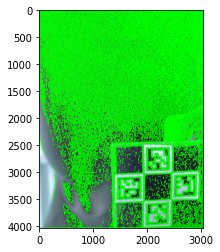

In [ ]:
success, H = find_homography_aruco(frame, marker, sigs)

In [ ]:
print(success)

False


In [ ]:
# function to detect ArUco Markers
def findArucoMarkers(img, markerSize = 6, totalMarkers=250, draw=True):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    key = getattr(cv2.aruco, f'DICT_{markerSize}X{markerSize}_{totalMarkers}')
    
    
    #Load the dictionary that was used to generate the markers.
    arucoDict = cv2.aruco.Dictionary_get(key)
    
    # Initialize the detector parameters using default values
    arucoParam = cv2.aruco.DetectorParameters_create()
    
    # Detect the markers
    bboxs, ids, rejected = cv2.aruco.detectMarkers(gray, arucoDict, parameters = arucoParam)
    return bboxs, ids

In [ ]:
dist #11.8 mm to marker

array([[-2.37240362e-02],
       [-1.00239655e-03],
       [-1.24320575e-01],
       [-7.56745472e-03],
       [-2.49151605e-05],
       [ 5.43673063e-02],
       [ 3.02028210e-03],
       [-1.96071644e-04],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00]])

In [50]:
mtx = np.array([[1.1871, 0, 0.4129], [0, 1.1945, 0.2739], [0, 0, 0.0001]])

In [ ]:
np.savetxt(imagesFolder+"calib_mtx_webcam.csv", mtx)
np.savetxt(imagesFolder+"calib_dist_webcam.csv", dist)

## Check calibration 

<IPython.core.display.Javascript object>


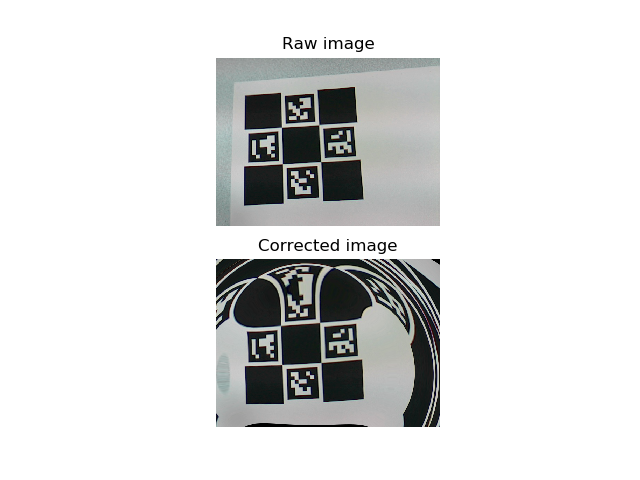

In [ ]:
i=24 # select image id
plt.figure()
frame = cv2.imread(imagesFolder + "image_100.jpg".format(i))
img_undist = cv2.undistort(frame,mtx,dist,None)
plt.subplot(211)
plt.imshow(frame)
plt.title("Raw image")
plt.axis("off")
plt.subplot(212)
plt.imshow(img_undist)
plt.title("Corrected image")
plt.axis("off")
plt.show()

# Use of camera calibration for estimation of 3D translation and rotation of marker

<IPython.core.display.Javascript object>


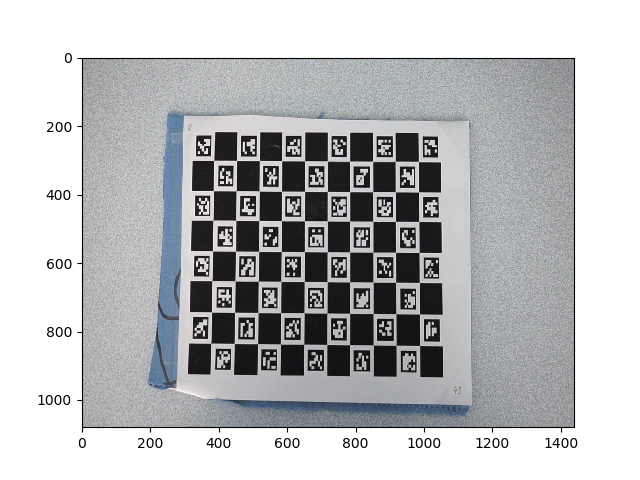

In [ ]:
frame = cv2.imread(imagesFolder + "image_10.jpg")
plt.figure()
plt.imshow(frame)
plt.show()

# Post processing

In [ ]:
%%time

gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
aruco_dict = aruco.Dictionary_get(aruco.DICT_6X6_250)
parameters =  aruco.DetectorParameters_create()
corners, ids, rejectedImgPoints = aruco.detectMarkers(gray, aruco_dict, parameters=parameters)
frame_markers = aruco.drawDetectedMarkers(frame.copy(), corners, ids)

Wall time: 38.1 ms


# Result

<IPython.core.display.Javascript object>


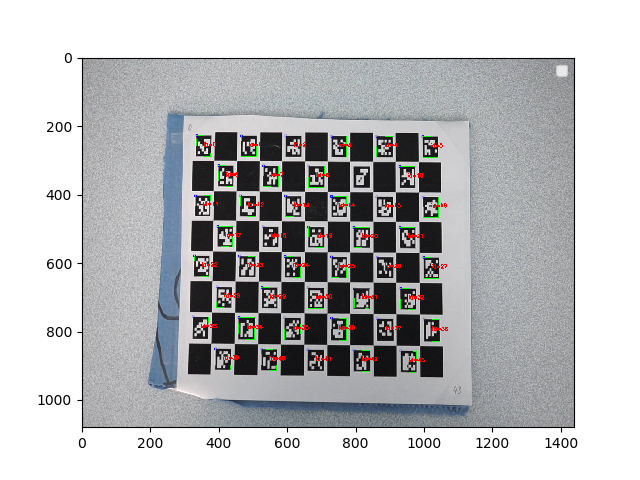

No handles with labels found to put in legend.


In [ ]:
conn = np.array([0, 1, 2, 3, 0])
plt.figure()
plt.imshow(frame_markers)
plt.legend()
plt.show()

### Add local axis on each maker

In [ ]:
size_of_marker =  0.0145 # side lenght of the marker in meter
rvecs,tvecs, trash = aruco.estimatePoseSingleMarkers(corners, size_of_marker , mtx, dist)

In [ ]:
tvecs

array([[[ 0.03625717,  0.04684617,  0.46653871]],

       [[ 0.07796683,  0.00174052,  0.44514342]],

       [[ 0.0131153 , -0.02022943,  0.44694283]],

       [[-0.11509333, -0.02061886,  0.4465331 ]],

       [[ 0.07544442, -0.0398416 ,  0.43262915]],

       [[ 0.09802467, -0.06131984,  0.44035666]],

       [[ 0.05448294, -0.06054667,  0.4326234 ]],

       [[ 0.05369867,  0.0631415 ,  0.42116605]],

       [[-0.11193155,  0.06244439,  0.427018  ]],

       [[ 0.05551877,  0.02247846,  0.43705436]],

       [[ 0.05492523, -0.01945728,  0.43442988]],

       [[-0.00789508, -0.03981689,  0.42867534]],

       [[-0.07027212, -0.06136102,  0.43652852]],

       [[ 0.07773333,  0.08803092,  0.43954609]],

       [[ 0.03309225,  0.08473541,  0.42561175]],

       [[-0.0083905 ,  0.08445285,  0.42618681]],

       [[-0.05225633,  0.08741113,  0.4432211 ]],

       [[-0.09553183,  0.08714634,  0.44444085]],

       [[ 0.09551237,  0.06367101,  0.42236155]],

       [[ 0.01270016,  0.065401

In [ ]:
tvecs.shape

(43, 1, 3)

In [ ]:
np.degrees(rvecs)

array([[[  1.62516394e+02,   2.46355609e+00,  -1.09402896e+01]],

       [[  1.79457420e+02,   7.19277484e-02,  -1.32140582e+00]],

       [[  1.77773147e+02,  -9.91113450e-01,   5.53146653e+00]],

       [[ -1.85403347e+02,  -2.23002873e-01,   1.24063729e+01]],

       [[  1.81444729e+02,  -7.25485937e-01,   1.04275177e+01]],

       [[  1.77398449e+02,  -2.71016859e-01,   7.89579400e+00]],

       [[  1.73242093e+02,   1.79338050e+00,  -5.06408000e+00]],

       [[  1.66617310e+02,  -7.61331890e-01,  -1.96025399e+01]],

       [[ -1.79129608e+02,  -4.21227613e+00,  -6.45245428e+01]],

       [[  1.81282644e+02,  -1.57056435e-01,  -6.86839568e-01]],

       [[  1.65840660e+02,   9.53216792e-01,  -4.33656312e+00]],

       [[  1.76040502e+02,   1.50523348e+00,  -1.30437940e+01]],

       [[  1.72773893e+02,   9.89154542e-01,  -6.18063691e+00]],

       [[ -1.83491628e+02,  -2.23552817e+00,  -8.18637179e-01]],

       [[ -1.76798040e+02,  -1.43834284e+00,   2.15416822e-01]],

       [[ 

In [ ]:
length_of_axis = 0.01
imaxis = aruco.drawDetectedMarkers(frame.copy(), corners, ids)
for i in range(len(tvecs)):
    imaxis = aruco.drawAxis(imaxis, mtx, dist, rvecs[i], tvecs[i], length_of_axis)

<IPython.core.display.Javascript object>


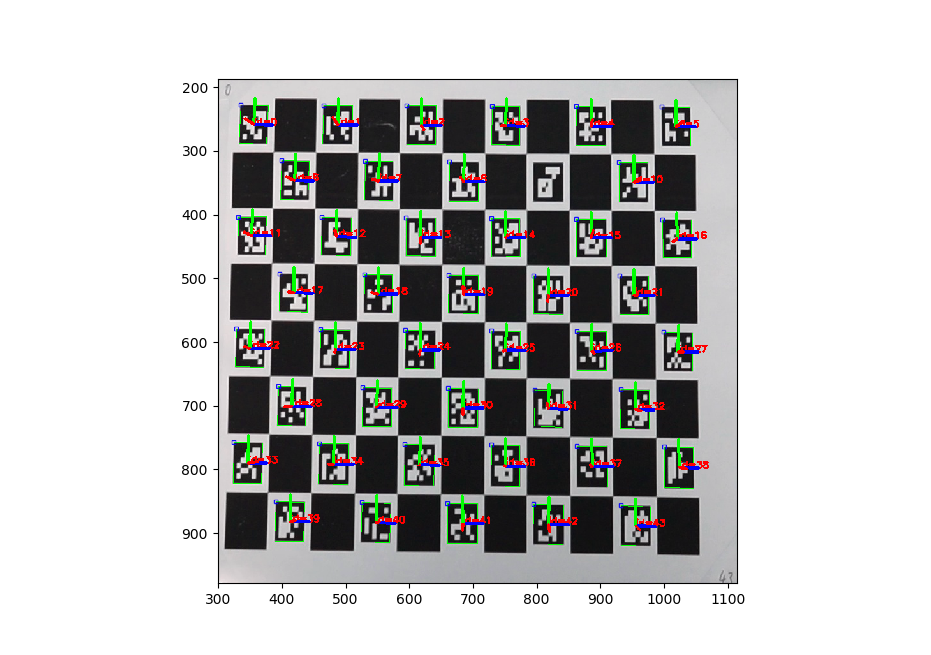

In [ ]:
plt.figure()
plt.imshow(imaxis)
plt.show()

In [ ]:
data=pd.DataFrame(data=tvecs.reshape(43,3),columns=["tx","ty","tz"],index=ids.flatten())
data.index.name="makers"
data.sort_index(inplace=True)
data

,tx,ty,tz
makers,,,
0,-0.112976,-0.062107,0.442287
1,-0.070272,-0.061361,0.436529
2,-0.029102,-0.061471,0.437813
3,0.013126,-0.062967,0.449129
4,0.054483,-0.060547,0.432623
5,0.098025,-0.061320,0.440357
6,-0.091830,-0.040953,0.438378
7,-0.050168,-0.040780,0.437449
8,-0.007895,-0.039817,0.428675


In [ ]:
p=data.values
((p[1]-p[0])**2.).sum()**.5,((p[2]-p[1])**2.).sum()**.5,((p[3]-p[2])**2.).sum()**.5

(0.04309652659780655, 0.041190101023714003, 0.043743470242086288)

In [ ]:
((data.loc[11]-data.loc[0]).values**2).sum()

0.001743801337263979

In [ ]:
V0_1= p[1]-p[0]
V0_11=p[11]-p[0]
V0_1,V0_11

(array([ 0.0427035 ,  0.00074629, -0.00575889]),
 array([ 0.04097137,  0.04177   ,  0.00013852]))

In [ ]:
np.dot(V0_1,V0_11)

0.0017799953347752665

<IPython.core.display.Javascript object>


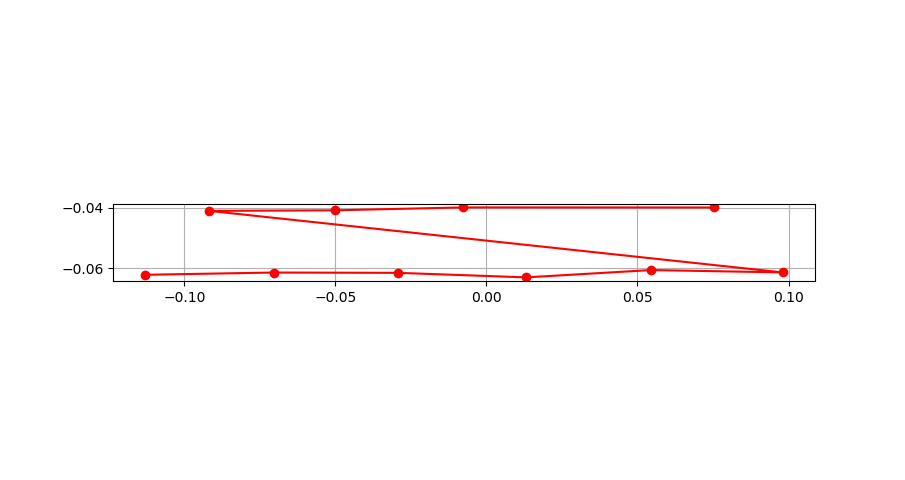

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.set_aspect("equal")
plt.plot(data.tx[:10], data.ty[:10],"or-")
plt.grid()
plt.show()

In [ ]:
data.tx

In [ ]:
corners=np.array(corners)
data2=pd.DataFrame({"px":corners[:,0,0,1],"py":corners[:,0,0,0]},index=ids.flatten())
data2.sort_index(inplace=True)

data2

,px,py
0,229.0,335.0
1,230.0,465.0
2,230.0,595.0
3,231.0,729.0
4,231.0,861.0
5,232.0,995.0
6,316.0,399.0
7,317.0,530.0
8,318.0,662.0
10,319.0,928.0


In [ ]:
n0=data2.loc[0]
n1=data2.loc[1]
d01=((n0-n1).values**2).sum()**.5
d=42.5e-3
factor=d/d01
data2["x"]=data2.px*factor
data2["y"]=data2.py*factor
d1_0=data2.loc[2].y-data2.loc[1].y
d11_0=data2.loc[11].x-data2.loc[0].x
d1_0


0.042498738

In [ ]:
d11_0

0.057536766

In [ ]:
imagesFolder = "E:\Desktop\S8\Projet 851\data"
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
board = cv2.aruco.CharucoBoard_create(3,3,.025,.0125,dictionary)
img = board.draw((200*3,200*3))
cv2.imwrite(imagesFolder + '\charucotest.png',img)


True

In [ ]:
help (aruco)

Help on module cv2.aruco in cv2:

NAME
    cv2.aruco

FUNCTIONS
    Board_create(...)
        Board_create(objPoints, dictionary, ids) -> retval
        .   * @brief Provide way to create Board by passing nessesary data. Specially needed in Python.
        .   *
        .   * @param objPoints array of object points of all the marker corners in the board
        .   * @param dictionary the dictionary of markers employed for this board
        .   * @param ids vector of the identifiers of the markers in the board
        .   *
    
    CharucoBoard_create(...)
        CharucoBoard_create(squaresX, squaresY, squareLength, markerLength, dictionary) -> retval
        .   * @brief Create a CharucoBoard object
        .   *
        .   * @param squaresX number of chessboard squares in X direction
        .   * @param squaresY number of chessboard squares in Y direction
        .   * @param squareLength chessboard square side length (normally in meters)
        .   * @param markerLength marker

In [ ]:
charucoCorners=allCorners,
                      charucoIds=allIds,
                      board=board,
                      imageSize=imsize,
                      cameraMatrix=cameraMatrixInit,
                      distCoeffs=distCoeffsInit,
                      flags=flags,
                      criteria=(cv2.TERM_CRITERIA_EPS & cv2.TERM_CRITERIA_COUNT, 10000, 1e-9)

In [ ]:
help (aruco.calibrateCameraCharucoExtended)

Help on built-in function calibrateCameraCharuco:

calibrateCameraCharuco(...)
    calibrateCameraCharuco(charucoCorners, charucoIds, board, imageSize, cameraMatrix, distCoeffs[, rvecs[, tvecs[, flags[, criteria]]]]) -> retval, cameraMatrix, distCoeffs, rvecs, tvecs
    .   @brief It's the same function as #calibrateCameraCharuco but without calibration error estimation.



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57139055-d9d5-4919-ae00-c8ca9e49e414' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>